The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


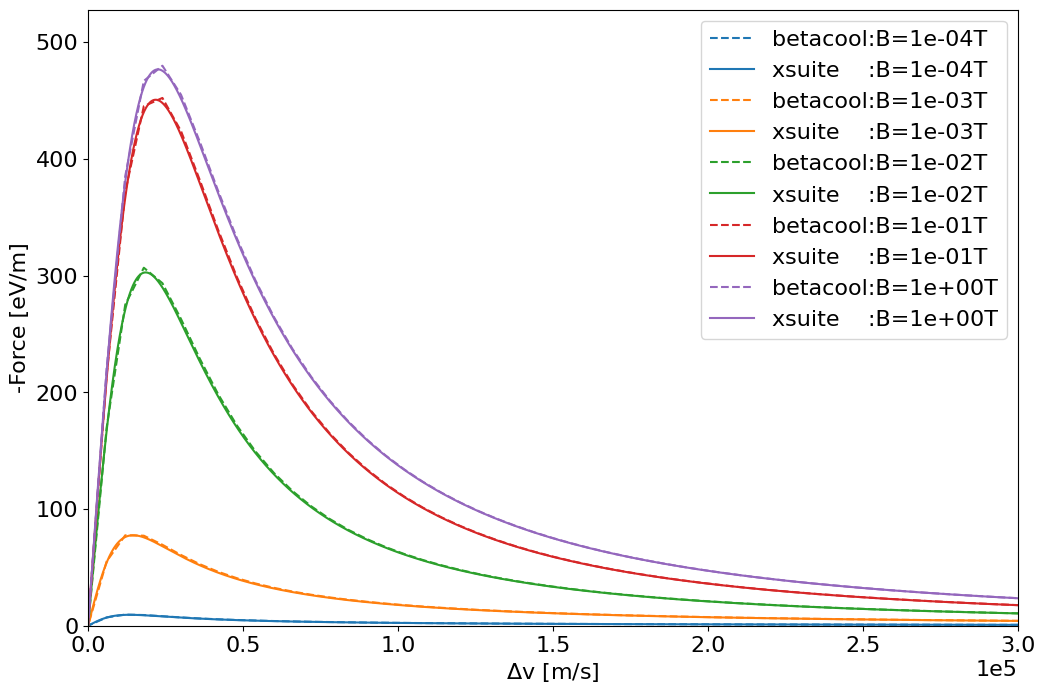

In [5]:
import numpy as np
import matplotlib.pyplot as plt

magnetic_field_list = [0.0001,0.001,0.01,0.1,1] # Tesla

def load_data(module,magnetic_field):
    filename = f"results/force_{module}_B={magnetic_field:.0e}.npz"
    data = np.load(filename)
    v_diff = data['v_diff']
    force = data['force']
    return v_diff,force

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 16})

for i,magnetic_field in enumerate(magnetic_field_list):
    v_diff,force = load_data('betacool',magnetic_field)
    plt.plot(v_diff, -force, label=f'betacool:B={magnetic_field:.0e}T',color=cmap(i),linestyle='--')
    v_diff,force= load_data('xsuite',magnetic_field)
    plt.plot(v_diff, -force, label=f'xsuite    :B={magnetic_field:.0e}T',color=cmap(i))

plt.xlabel('$\Delta$v [m/s]')
plt.ylabel('-Force [eV/m]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.xlim([0,3e5])
plt.axis(ymin = 0)
plt.savefig('force_magnetic_field.png', dpi=300)
plt.savefig('force_magnetic_field.eps', dpi=300)
plt.show()